In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score,classification_report
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import matplotlib.pyplot as plt

Load Dataset in

In [2]:
col_names = ["id",	"age",	"sex",	"region",	"income",	"married",	"children",	"car",	"save_act",	"current_act",	"mortgage",	"pep"]
df = pd.read_excel('bank.xlsx', header=None, names=col_names, skiprows=[0])

df.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [3]:
# Creating a instance of label Encoder.
cols = ["sex", "married", "car", "save_act", "current_act", "mortgage", "pep"]
df = pd.get_dummies(df, columns=cols, drop_first=True)
# Convert the non-binary categorical data into numerical data using label encoder
label_encoder = LabelEncoder()
df["region"] = label_encoder.fit_transform(df["region"])

In [4]:
df.head()

,id,age,region,income,children,sex_MALE,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,pep_YES
0,ID12101,48,0,17546.0,1,0,0,0,0,0,0,1
1,ID12102,40,3,30085.1,3,1,1,1,0,1,1,0
2,ID12103,51,0,16575.4,0,0,1,1,1,1,0,0
3,ID12104,23,3,20375.4,3,0,1,0,0,1,0,0
4,ID12105,57,1,50576.3,0,0,1,0,1,0,0,0


Split the dataset to train the model

In [5]:
#split dataset in features and target variable
feature_cols = ["age", "children", "sex_MALE", "income", "married_YES", "car_YES", "save_act_YES", "current_act_YES", "mortgage_YES"]
X = df[feature_cols] # Features
y = df.pep_YES # Target variable

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Building decision tree model

Evaluate the model from entropy criterion

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision, how consistent is the classifier?
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.8888888888888888
Precision: 0.875


In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision, how consistent is the classifier?
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.8277777777777777
Precision: 0.788235294117647


Since the accuracy can still be hyper parm tune, we will do that to optimize the model (later)

Visualizing the tree

In [12]:
import graphviz
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image 
import pydotplus

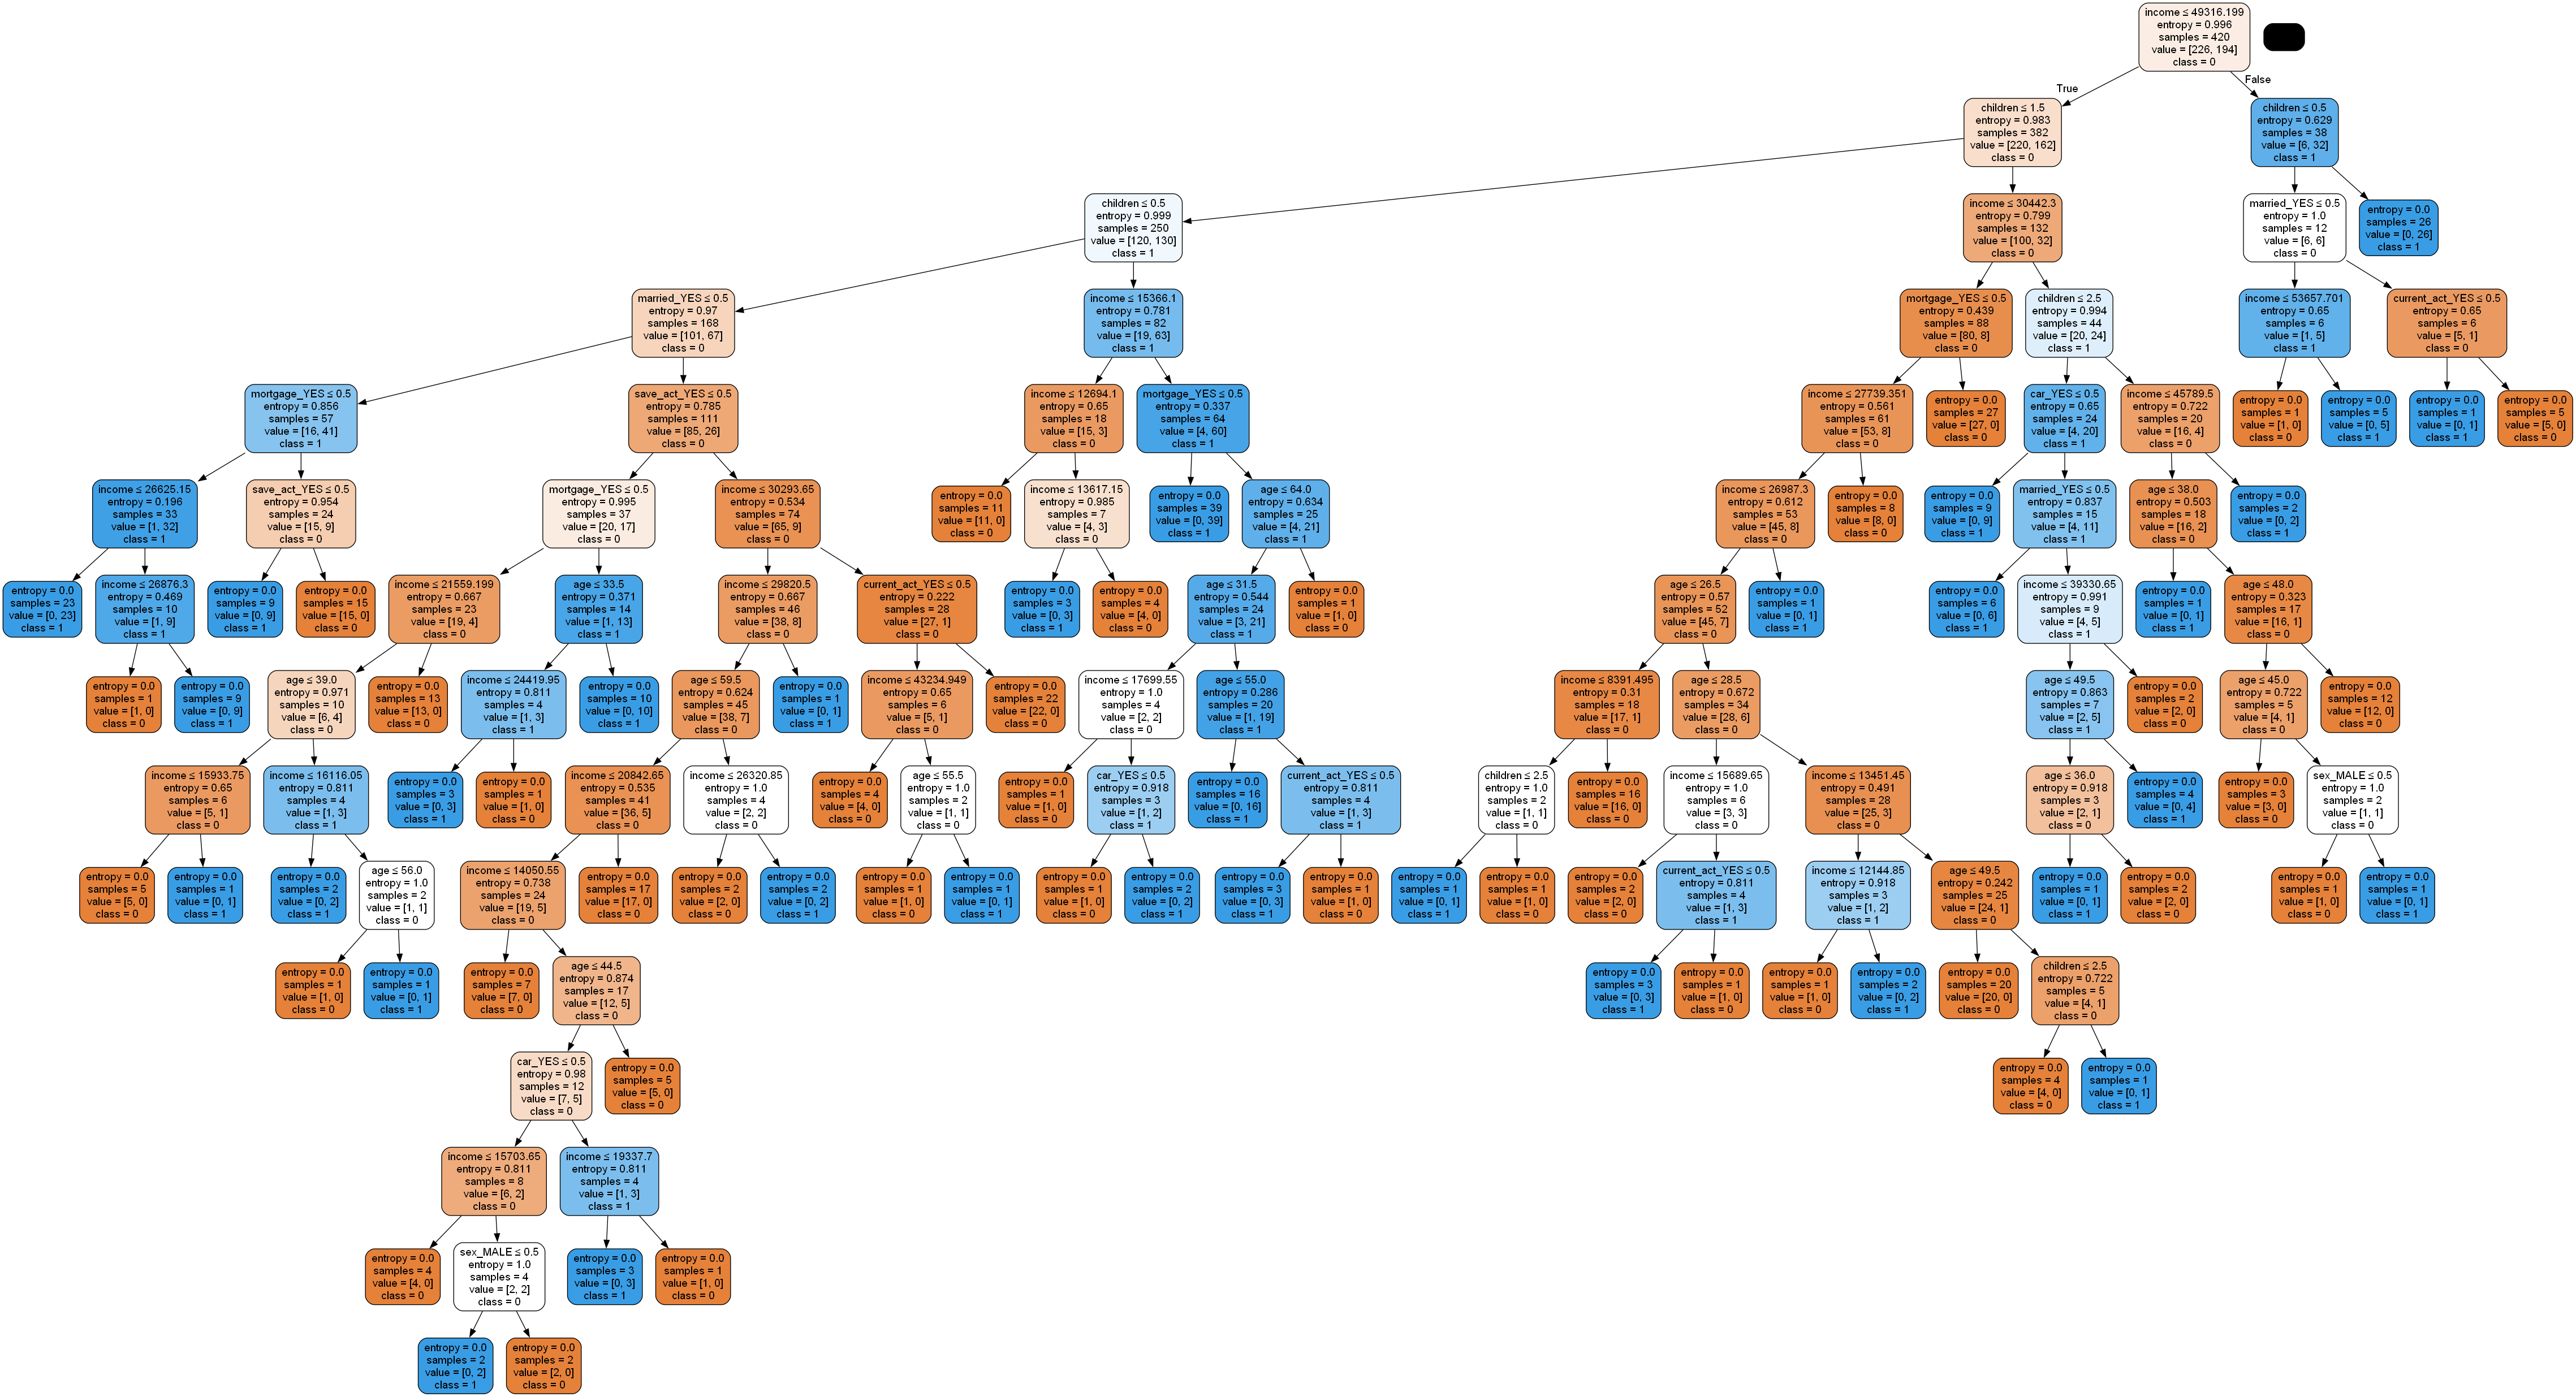

In [13]:
# Visualizing the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank-tree.png')
Image(graph.create_png())

Optimize the decision tree performance 

Text(0.5, 1.0, 'Accuracy vs. Max Depth')

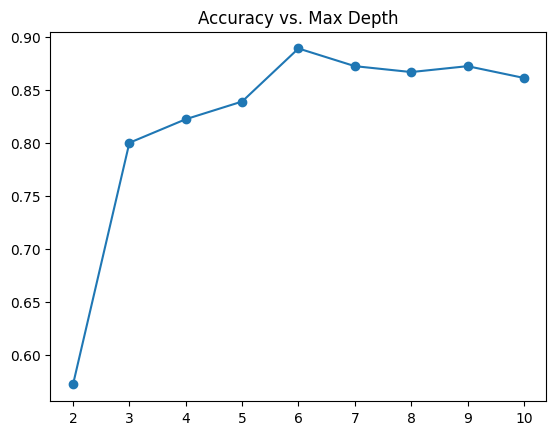

In [12]:
# By hyperparameter tuning the depth of trees to optimize the mode
# Here we can see that max depth of 6 give the most accurate val
# Thus this confirm with the earlier model evaluation showing of 89%
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_values = []
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.plot(max_depth_values, accuracy_values, marker='o')
plt.title('Accuracy vs. Max Depth')

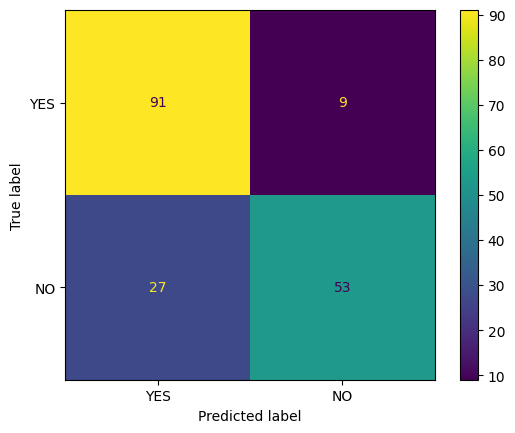

In [15]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
visualized_cm = ConfusionMatrixDisplay(cm, display_labels=["YES", "NO"]).plot()
# Note: The top left are the True Positives,
# The top right are the False Positives,
# The bottom left are the False Negatives,
# The bottom right are the True Negatives.

Decision tree Pros:
- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.

Decision tree Cons:
- Sensitive to noisy data. It can overfit noisy data.
- Decision trees are biased with imbalance dataset